In [1]:
from readers import *
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
training, target = generate_dataset(qtd_max=200)

rotacionando images

In [3]:
def rotate_image(image, angle, fill_color=(0, 0, 0)) -> np.ndarray:
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)

    return np.array([cv2.warpAffine(image, M, (w, h), borderValue=fill_color), image])

In [4]:
r = (rotate_image(training[i], 45) for i in range(3))

In [5]:
um = training[0]

In [6]:
um = rotate_image(um, -10)

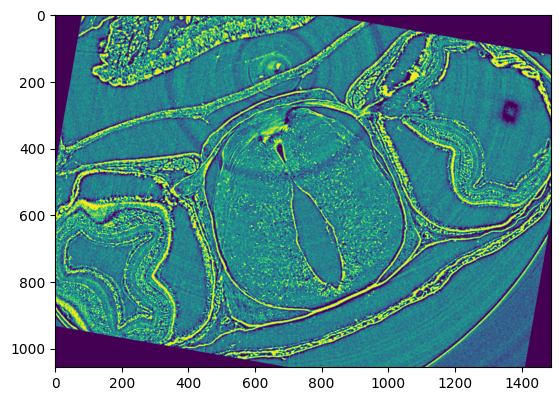

In [7]:
plt.imshow(um[0])

dividindo em 4 images

In [8]:
def cut_image_into_four(image_array):
    # Calculate the center
    center_y, center_x = image_array.shape[0] // 2, image_array.shape[1] // 2

    # Cut the image into four pieces
    top_left = image_array[:center_y, :center_x]
    top_right = image_array[:center_y, center_x:]
    bottom_left = image_array[center_y:, :center_x]
    bottom_right = image_array[center_y:, center_x:]

    return np.array([top_left, top_right, bottom_left, bottom_right])[:, :, :-8]


In [14]:
four = cut_image_into_four(um[0])

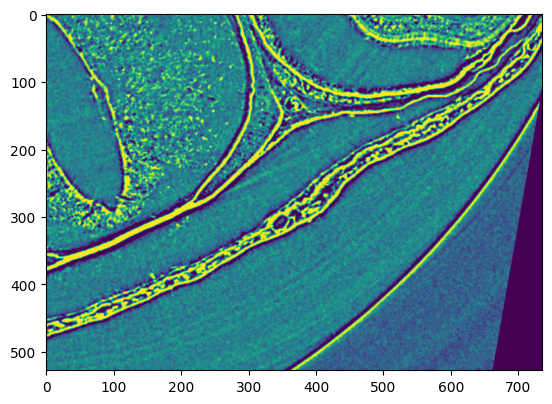

In [16]:
plt.imshow(four[3])

In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from readers import *

def open_image_with_PIL(path: str):
    return np.array(Image.open(path))

In [2]:
training, target = load_generated_data()

In [3]:
training

['images/train/img_0.png',
 'images/train/img_1.png',
 'images/train/img_2.png',
 'images/train/img_3.png',
 'images/train/img_4.png',
 'images/train/img_5.png',
 'images/train/img_6.png',
 'images/train/img_7.png',
 'images/train/img_8.png',
 'images/train/img_9.png',
 'images/train/img_10.png',
 'images/train/img_11.png',
 'images/train/img_12.png',
 'images/train/img_13.png',
 'images/train/img_14.png',
 'images/train/img_15.png',
 'images/train/img_16.png',
 'images/train/img_17.png',
 'images/train/img_18.png',
 'images/train/img_19.png',
 'images/train/img_20.png',
 'images/train/img_21.png',
 'images/train/img_22.png',
 'images/train/img_23.png',
 'images/train/img_24.png',
 'images/train/img_25.png',
 'images/train/img_26.png',
 'images/train/img_27.png',
 'images/train/img_28.png',
 'images/train/img_29.png',
 'images/train/img_30.png',
 'images/train/img_31.png',
 'images/train/img_32.png',
 'images/train/img_33.png',
 'images/train/img_34.png',
 'images/train/img_35.png',
 '

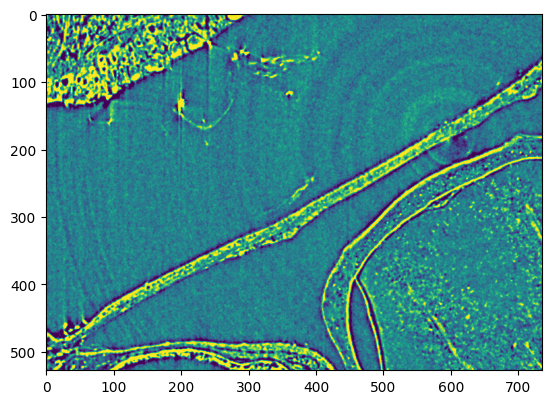

In [27]:
plt.imshow(training[3])

In [10]:
im = cut_image_into_four(training[0])

In [11]:
def reassemble_image(quadrants):
    # Assuming quadrants is a list [top_left, top_right, bottom_left, bottom_right]
    top = np.concatenate((quadrants[0], quadrants[1]), axis=1)
    bottom = np.concatenate((quadrants[2], quadrants[3]), axis=1)
    full_image = np.concatenate((top, bottom), axis=0)
    return full_image

# Example usage:
# quadrants = cut_image_into_four(image_array)
# reassembled_image = reassemble_image(quadrants)


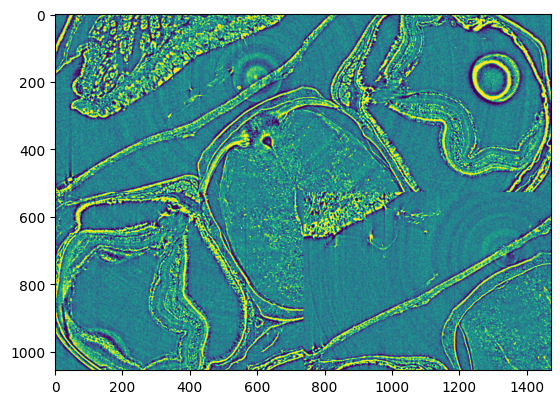

In [17]:
plt.imshow(reassemble_image(training[0:4]))